In [ ]:
import PIL 
from PIL import Image
import pandas aqs pd
import glob
import os
import altair as alt
import seaborn as sns
import numpy as np
import re

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import keras

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.layers import BatchNormalization, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [6]:
import sys
from PIL import Image
sys.modules['Image'] = Image 
import cv2 as cv
import tensorflow as tf
import keras.backend as K

In [7]:
from keras import regularizers
from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
from keras.layers import Dense,GlobalAveragePooling2D
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import VGG16

In [8]:
image_path=glob.glob("apparel dataset//*//*")

### Extracting the Folder names from the image path

In [9]:
category_names=[]
for f in glob.glob("apparel dataset//*//*"):
    path = os.path.split(f)[-2]
    category_names.append(path)

['apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel dataset\\black_dress',
 'apparel 

### Splitting the Apparel categories from the Folder names. The Categories variable contains: Dress, Pants, Shoes, Shirt and Shorts Values. 

In [11]:
categories=[]
for i in range(0,len(category_names)):
    categories.append(category_names[i].split("\\""")[1].split('_')[1])

### Creating the dataframe which is used to recommend the apparels. The DataFrame consists of Image path and its Category.

In [13]:
database_dict =  {'Category':categories,'path':image_path}
database = pd.DataFrame(database_dict)

The below code will iterate through the dataset to extract the pixels. Below are the steps involved:
1. RGB image is converted to Grayscale
2. Grayscale image is resized to 30x30.
3. Image Pixels are extracted and appended to "data" dataframe. Each row consists pixels of one Image.
4. Column names are created, here the column names will start from pixel1 to pixel 900 and these values are stored in "Columns_names" list.
5. Category column which is created from "categories" list is appended to the "data" dataframe. 

In [14]:
i=0
for img in image_path:
    raw_image = Image.open(img).convert("LA")
    grey_scale_image=raw_image.resize((30,30))
    pixels = list(grey_scale_image.getdata())
    if i==0:
        column_names =[]
        counter = 0
        for pixel in pixels:
            counter += 1
            column_names.append('pixel'+ str(counter))
        pixel_data =[]
        counter = 0
        for pixel in pixels:
            pixel_data.append(pixels[counter][0])
            counter += 1 
        pixel_data = [pixel_data]
        data=pd.DataFrame(pixel_data)
        i = 1
    elif i==1:
        pixel_data =[]
        counter = 0
        for pixel in pixels:
            pixel_data.append(pixels[counter][0])
            counter += 1 
           # pixel_data
        pixel_data = [pixel_data]
        data=data.append(pixel_data,ignore_index=False)

In [15]:
data["Category"]= categories
column_names.append("Category")
data.columns = column_names

In [16]:
data.to_csv("pixels.csv")

In [17]:
data_csv = pd.read_csv("pixels.csv")

In [18]:
data1 = data_csv.copy()

In [19]:
data1

,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel892,pixel893,pixel894,pixel895,pixel896,pixel897,pixel898,pixel899,pixel900,Category
0,0,11,12,12,14,20,25,11,55,21,...,87,86,84,83,82,83,83,82,80,dress
1,0,220,222,224,226,226,230,233,234,236,...,238,238,238,237,237,237,237,237,238,dress
2,0,149,152,130,88,70,79,228,204,189,...,0,0,0,0,0,0,9,76,77,dress
3,0,65,66,66,67,67,68,68,68,68,...,79,78,77,76,75,74,74,73,72,dress
4,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,dress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11380,0,255,255,255,255,255,255,229,123,106,...,194,222,255,255,255,255,255,255,255,shorts
11381,0,255,255,255,255,255,255,255,255,255,...,232,244,237,227,255,255,255,255,255,shorts
11382,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,shorts
11383,0,246,247,215,137,163,189,245,241,143,...,229,232,232,232,232,232,232,232,233,shorts


In [26]:


#data1 = data1.drop("Unnamed: 0",axis=1)

In [24]:
X = data1.loc[:, ~data1.columns.isin(['Category'])]
Y = data1.loc[:, data1.columns == 'Category']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [25]:
# Shape of the 4 created datasets
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(9108, 900)
(9108, 1)
(2277, 900)
(2277, 1)


In [28]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, log_loss,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import plot_tree
from sklearn.preprocessing import OneHotEncoder
import random, shutil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

C:\Users\mukes\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
#1. Decision tree classifier 
decision = DecisionTreeClassifier()
decision.fit(X_train, Y_train)
DecisionTreeClassifier_predictions = decision.predict(X_test)

acc = accuracy_score(Y_test, DecisionTreeClassifier_predictions)
print("Accuracy:  "+str(acc))
print("----------------------------------------------------------------------------------")
print("Classification Report")
print("---------------------------------------")
print(classification_report(Y_test,DecisionTreeClassifier_predictions))
print("----------------------------------------------------------------------------------")
print("Confusion Matrix")
print("---------------------------------------")
print(confusion_matrix(Y_test,DecisionTreeClassifier_predictions))

Accuracy:  0.6996047430830039
----------------------------------------------------------------------------------
Classification Report
---------------------------------------
              precision    recall  f1-score   support

       dress       0.67      0.65      0.66       511
       pants       0.75      0.76      0.75       553
       shirt       0.74      0.75      0.74       338
       shoes       0.76      0.72      0.74       706
      shorts       0.39      0.45      0.42       169

    accuracy                           0.70      2277
   macro avg       0.66      0.67      0.66      2277
weighted avg       0.70      0.70      0.70      2277

----------------------------------------------------------------------------------
Confusion Matrix
---------------------------------------
[[334  54  35  67  21]
 [ 52 418   8  44  31]
 [ 33  18 254  15  18]
 [ 67  49  29 511  50]
 [ 14  22  18  39  76]]


In [30]:
# 2. Creating GradientBoostingClassifier
Gradient = GradientBoostingClassifier()
Gradient.fit(X_train, Y_train)
GradientBoostingClassifier_predictions = Gradient.predict(X_test)

acc = accuracy_score(Y_test, GradientBoostingClassifier_predictions)
print("Accuracy:  "+str(acc))
print("----------------------------------------------------------------------------------")
print("Classification Report")
print("---------------------------------------")
print(classification_report(Y_test,GradientBoostingClassifier_predictions))
print("----------------------------------------------------------------------------------")
print("Confusion Matrix")
print("---------------------------------------")
print(confusion_matrix(Y_test,GradientBoostingClassifier_predictions))

C:\Users\mukes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy:  0.8326745718050066
----------------------------------------------------------------------------------
Classification Report
---------------------------------------
              precision    recall  f1-score   support

       dress       0.78      0.85      0.81       511
       pants       0.88      0.84      0.86       553
       shirt       0.87      0.86      0.86       338
       shoes       0.83      0.85      0.84       706
      shorts       0.80      0.61      0.69       169

    accuracy                           0.83      2277
   macro avg       0.83      0.80      0.81      2277
weighted avg       0.83      0.83      0.83      2277

----------------------------------------------------------------------------------
Confusion Matrix
---------------------------------------
[[436  13  18  42   2]
 [ 37 467  11  32   6]
 [ 25   3 290  15   5]
 [ 52  33   9 600  12]
 [ 11  17   7  31 103]]


In [31]:
# 3. XGBoost Classifier
XGBmodel = XGBClassifier()
XGBmodel.fit(X_train, Y_train)
XGBmodel_prediction = XGBmodel.predict(X_test)


acc = accuracy_score(Y_test, XGBmodel_prediction)
print("Accuracy:  "+str(acc))
print("----------------------------------------------------------------------------------")
print("Classification Report")
print("---------------------------------------")
print(classification_report(Y_test,XGBmodel_prediction))
print("----------------------------------------------------------------------------------")
print("Confusion Matrix")
print("---------------------------------------")
print(confusion_matrix(Y_test,XGBmodel_prediction))

C:\Users\mukes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy:  0.8770311813790075
----------------------------------------------------------------------------------
Classification Report
---------------------------------------
              precision    recall  f1-score   support

       dress       0.85      0.89      0.87       511
       pants       0.89      0.89      0.89       553
       shirt       0.91      0.88      0.90       338
       shoes       0.87      0.90      0.88       706
      shorts       0.86      0.70      0.78       169

    accuracy                           0.88      2277
   macro avg       0.88      0.85      0.86      2277
weighted avg       0.88      0.88      0.88      2277

----------------------------------------------------------------------------------
Confusion Matrix
---------------------------------------
[[457  16  13  23   2]
 [ 19 490   8  31   5]
 [ 18   3 299  13   5]
 [ 39  23   5 632   7]
 [  7  17   2  24 119]]


In [32]:
from sklearn.model_selection import GridSearchCV
XGBmodel = XGBClassifier()

optimization_dict = {'max_depth': [2,4,6,8],
                     'n_estimators': [50,100,200,400]}

XGBmodel = GridSearchCV(XGBmodel, optimization_dict, 
                     scoring='accuracy', verbose=1)
XGBmodel.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\mukes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 102.5min finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,
                  

In [33]:
XGBmodel_prediction = XGBmodel.predict(X_test)

acc = accuracy_score(Y_test, XGBmodel_prediction)
print("Accuracy:  "+str(acc))
print("----------------------------------------------------------------------------------")
print("Classification Report")
print("---------------------------------------")
print(classification_report(Y_test,XGBmodel_prediction))
print("----------------------------------------------------------------------------------")
print("Confusion Matrix")
print("---------------------------------------")
print(confusion_matrix(Y_test,XGBmodel_prediction))

Accuracy:  0.8792270531400966
----------------------------------------------------------------------------------
Classification Report
---------------------------------------
              precision    recall  f1-score   support

       dress       0.83      0.90      0.87       511
       pants       0.90      0.89      0.89       553
       shirt       0.92      0.88      0.90       338
       shoes       0.89      0.90      0.89       706
      shorts       0.83      0.68      0.75       169

    accuracy                           0.88      2277
   macro avg       0.88      0.85      0.86      2277
weighted avg       0.88      0.88      0.88      2277

----------------------------------------------------------------------------------
Confusion Matrix
---------------------------------------
[[460  11  14  23   3]
 [ 19 494   6  26   8]
 [ 20   6 298   8   6]
 [ 41  20   4 635   6]
 [ 11  20   2  21 115]]


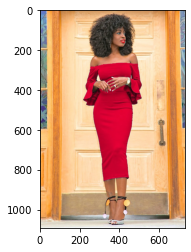

Output: dress


In [52]:
# dress
raw_image = Image.open("CoralaDress.jpg").convert("LA")
im=Image.open("CoralaDress.jpg")
grey_scale_image=raw_image.resize((30,30))
pixels = list(grey_scale_image.getdata())
pixel_data =[]
counter = 0
for pixel in pixels:
    pixel_data.append(pixels[counter][0])
    counter += 1 
    # pixel_data
pixel_data = [pixel_data]
data2=pd.DataFrame(pixel_data)
data2.columns=column_names[0:900]
test_output = XGBmodel.predict(data2)[0][0:6]
plt.imshow(im)
plt.show()
print("Output: "+test_output)

**********************Input*********************


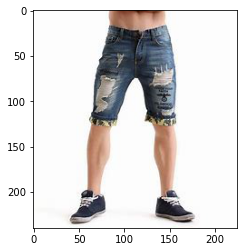

**Output**


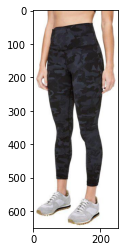

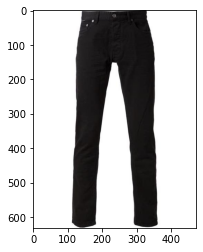

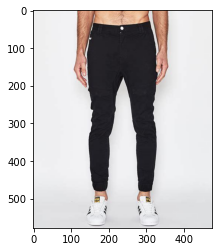

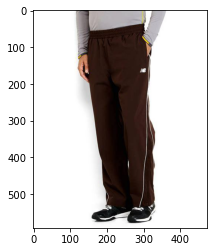

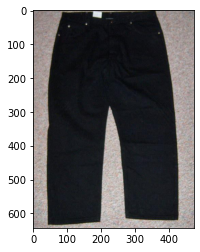

In [54]:
print("**********************Input*********************")
path = "manshort1.JFIF"
input_image = Image.open(path)
plt.imshow(input_image)
plt.show()
raw_image = Image.open(path).convert("LA")
grey_scale_image=raw_image.resize((30,30))
pixels = list(grey_scale_image.getdata())
pixel_data =[]
counter = 0
for pixel in pixels:
    pixel_data.append(pixels[counter][0])
    counter += 1 
    # pixel_data
pixel_data = [pixel_data]
data2=pd.DataFrame(pixel_data)
data2.columns=column_names[0:900]
test_output = XGBmodel.predict(data2)[0][0:6]
print("**Output**")
recommend=database.query("Category == ""'"+test_output+"'""").sample(5).reset_index()
#recommed = 
inc=0
for path in recommend["path"]:
    im = Image.open(recommend["path"][inc])
    plt.imshow(im)
    plt.show()
    inc +=1

In [ ]:
### CNN

In [55]:
# All the images are loaded into the "training_set" variable using ImageDataGenerator functions from Keras packages
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('CNN//train',
                      
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 11051 images belonging to 5 classes.


In [56]:
# All the images are loaded into the "test_set" variable using ImageDataGenerator functions from Keras packages
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('CNN//test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2829 images belonging to 5 classes.


In [57]:
# Initializing the size of the input images
input_shape = (64, 64, 3)

In [58]:
# Creating the 5 Convolutional layered model architecture
CNN_model = Sequential()

# First Layer
CNN_model.add(Conv2D(filters=32, kernel_size=3, padding = 'same', input_shape = [64, 64, 3], kernel_initializer = 'he_normal', activation = 'relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(3))
CNN_model.add(Dropout(0.25))

# Second Layer
CNN_model.add(Conv2D(filters=64,kernel_size= 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
CNN_model.add(BatchNormalization())

# Third Layer
CNN_model.add(Conv2D(filters=64,kernel_size= 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D())
CNN_model.add(Dropout(0.25))

# Fourth Layer
CNN_model.add(Conv2D(filters=128, kernel_size=3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
CNN_model.add(BatchNormalization())

# Fifth Layer
CNN_model.add(Conv2D(filters=128,kernel_size= 2, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D())
CNN_model.add(Dropout(0.25))

# Fully Connected layer
CNN_model.add(Flatten())
CNN_model.add(Dense(1024, activation = 'relu', kernel_initializer = 'he_normal'))
CNN_model.add(BatchNormalization())
CNN_model.add(Dropout(0.5))

# Classification layer
CNN_model.add(Dense(5, activation = 'sigmoid'))

checkpoint = ModelCheckpoint('CNN_checkpoint', save_best_only = True, monitor = 'val_loss', verbose = 1)

CNN_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = CNN_model.fit_generator(training_set, validation_data = test_set, epochs = 5, verbose = 1, callbacks = [checkpoint])

Epoch 1/5
346/346 [==============================] - 167s 484ms/step - loss: 0.3278 - accuracy: 0.8646 - val_loss: 0.2374 - val_accuracy: 0.9257

Epoch 00001: val_loss improved from inf to 0.23744, saving model to CNN_checkpoint
Epoch 2/5
346/346 [==============================] - 122s 354ms/step - loss: 0.1736 - accuracy: 0.9361 - val_loss: 0.2041 - val_accuracy: 0.9668

Epoch 00002: val_loss improved from 0.23744 to 0.20409, saving model to CNN_checkpoint
Epoch 3/5
346/346 [==============================] - 121s 349ms/step - loss: 0.1396 - accuracy: 0.9487 - val_loss: 0.1349 - val_accuracy: 0.9687

Epoch 00003: val_loss improved from 0.20409 to 0.13489, saving model to CNN_checkpoint
Epoch 4/5
346/346 [==============================] - 120s 348ms/step - loss: 0.1224 - accuracy: 0.9541 - val_loss: 0.0472 - val_accuracy: 0.9775

Epoch 00004: val_loss improved from 0.13489 to 0.04721, saving model to CNN_checkpoint
Epoch 5/5
346/346 [==============================] - 119s 345ms/step - l

In [59]:
# Creating the 5 Convolutional layered model architecture
CNN_model = Sequential()

# First Layer
CNN_model.add(Conv2D(filters=32, kernel_size=3, padding = 'same', input_shape = [64, 64, 3], kernel_initializer = 'he_normal', activation = 'relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(3))
CNN_model.add(Dropout(0.25))

# Second Layer
CNN_model.add(Conv2D(filters=64,kernel_size= 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
CNN_model.add(BatchNormalization())

# Third Layer
CNN_model.add(Conv2D(filters=64,kernel_size= 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D())
CNN_model.add(Dropout(0.25))

# Fourth Layer
CNN_model.add(Conv2D(filters=128, kernel_size=3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
CNN_model.add(BatchNormalization())

# Fifth Layer
CNN_model.add(Conv2D(filters=128,kernel_size= 2, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D())
CNN_model.add(Dropout(0.25))

# Fully Connected layer
CNN_model.add(Flatten())
CNN_model.add(Dense(1024, activation = 'relu', kernel_initializer = 'he_normal'))
CNN_model.add(BatchNormalization())
CNN_model.add(Dropout(0.5))

# Classification layer
CNN_model.add(Dense(5, activation = 'sigmoid'))

checkpoint = ModelCheckpoint('CNN_checkpoint', save_best_only = True, monitor = 'val_loss', verbose = 1)

CNN_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = CNN_model.fit_generator(training_set, validation_data = test_set, epochs = 10, verbose = 1, callbacks = [checkpoint])

Epoch 1/10
346/346 [==============================] - 118s 342ms/step - loss: 0.3374 - accuracy: 0.8643 - val_loss: 0.0505 - val_accuracy: 0.9388

Epoch 00001: val_loss improved from inf to 0.05051, saving model to CNN_checkpoint
Epoch 2/10
346/346 [==============================] - 116s 335ms/step - loss: 0.1726 - accuracy: 0.9352 - val_loss: 0.1809 - val_accuracy: 0.9678

Epoch 00002: val_loss did not improve from 0.05051
Epoch 3/10
346/346 [==============================] - 117s 337ms/step - loss: 0.1387 - accuracy: 0.9484 - val_loss: 0.0563 - val_accuracy: 0.9710

Epoch 00003: val_loss did not improve from 0.05051
Epoch 4/10
346/346 [==============================] - 117s 338ms/step - loss: 0.1190 - accuracy: 0.9562 - val_loss: 0.0943 - val_accuracy: 0.9758

Epoch 00004: val_loss did not improve from 0.05051
Epoch 5/10
346/346 [==============================] - 117s 338ms/step - loss: 0.1077 - accuracy: 0.9602 - val_loss: 0.0125 - val_accuracy: 0.9716

Epoch 00005: val_loss improve

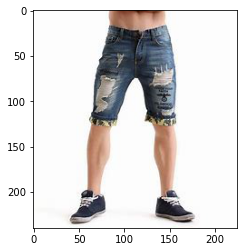

('pants', 0.9998182)

In [61]:
## pant
image = cv.imread(r'manshort1.jfif')
resized = cv.resize(image, (input_shape[1], input_shape[0]))
resized = (resized / 255.0).reshape(-1, input_shape[1], input_shape[0], input_shape[2])
preds = CNN_model.predict(resized)
preds = zip(['dress','pants','shirt','shoes','shorts'], list(preds[0]))
preds = sorted(list(preds), key = lambda z: z[1], reverse = True)[:1][0]
plt.imshow(Image.open("manshort1.jfif"))
plt.show()
preds

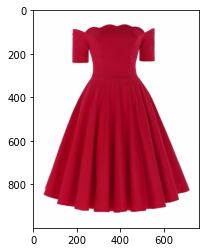

('dress', 0.99996847)

In [65]:
# Dresses
image = cv.imread(r'dress.jpg')
resized = cv.resize(image, (input_shape[1], input_shape[0]))
resized = (resized / 255.0).reshape(-1, input_shape[1], input_shape[0], input_shape[2])
preds = CNN_model.predict(resized)
preds = zip(['dress','pants','shirt','shoes','shorts'], list(preds[0]))
preds = sorted(list(preds), key = lambda z: z[1], reverse = True)[:1][0]
plt.imshow(Image.open("dress.jpg"))
plt.show()
preds

### Unsupervised Learning

# K-means

In [66]:
# Reading the pixel values of all the images into "data_csv" dataframe, copying the dataframe to "data1" and removing the uneccesary columns.
data_csv = pd.read_csv("pixels.csv")
data1 = data_csv.copy()
data1 = data1.drop("Unnamed: 0",axis=1)

In [67]:
# Loading the categories into "Categories" list 
Categories = data1["Category"]

In [68]:
# Dropping the Category column as we are not considering the labels for training the models.
data1 = data1.drop("Category",axis=1)

In [69]:
data3 = data1.copy()

In [70]:
# Applying the Normalization on the entire "data3" dataframe
data3 = data3/255

In [72]:
# Applying the StandardScaler function to transform the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
scaler=StandardScaler()
scaler.fit(data3)
scaled_data=scaler.transform(data3)

In [73]:
# Reducing the dimensions from 900 to 2
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [74]:
# Structure after StandardScaler and Principle component Analysis 
print(scaled_data.shape)
print(x_pca.shape)

(11385, 900)
(11385, 2)


In [75]:
# Creating the Sum of Squared errors to plot Elbow curve
Sum_of_squared_errors = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_pca)
    Sum_of_squared_errors.append(km.inertia_)

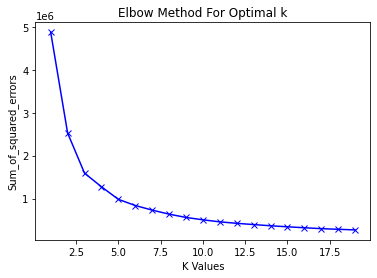

In [76]:
# PLotting the Elbow curve
plt.plot(K, Sum_of_squared_errors, 'bx-')
plt.xlabel('K Values')
plt.ylabel('Sum_of_squared_errors')
plt.title('Elbow Method For Optimal k')
plt.show()

In [77]:
# Applying the k-means algorithm with 5 Cluster size
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=42)
y_kmeans= kmeansmodel.fit_predict(x_pca)
cent = kmeansmodel.cluster_centers_
cluster_labels = kmeansmodel.labels_

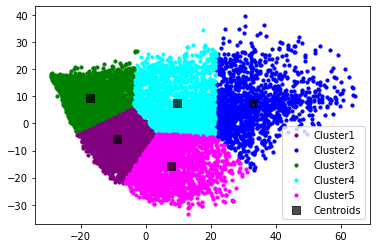

In [78]:
# Representing the CLusters in graphical representation
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1],s=10, c='purple',label='Cluster1')
#plt.show()
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1],s=10, c='blue',label='Cluster2')
#plt.show()
plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1],s=10, c='green',label='Cluster3')
#plt.show()
plt.scatter(x_pca[y_kmeans==3,0],x_pca[y_kmeans==3,1],s=10, c='cyan',label='Cluster4')
#plt.show()
plt.scatter(x_pca[y_kmeans==4,0],x_pca[y_kmeans==4,1],s=10, c='magenta',label='Cluster5')
#plt.show()
plt.scatter(kmeansmodel.cluster_centers_[:,0], kmeansmodel.cluster_centers_[:,1],s=50,marker='s', c='black', alpha=0.7, label='Centroids')
plt.legend()
plt.show()

In [79]:
# Calculating the accuracies of each Cluster and overall accuracy of the model
sample_silhouette_values = metrics.silhouette_samples(x_pca, cluster_labels)

means_lst = []
for label in range(5):
    means_lst.append(sample_silhouette_values[cluster_labels == label].mean())
print("Cluster 0: "+ str(means_lst[0]))
print("Cluster 1: "+ str(means_lst[1]))
print("Cluster 2: "+ str(means_lst[2]))
print("Cluster 3: "+ str(means_lst[3]))
print("Cluster 4: "+ str(means_lst[4]))
print("Average Silhouette Accuracy : %0.3f"% metrics.silhouette_score(x_pca, cluster_labels,metric='euclidean')) 

Cluster 0: 0.39218294501214906
Cluster 1: 0.36738021866085835
Cluster 2: 0.445557106953066
Cluster 3: 0.2975579578385649
Cluster 4: 0.3331994807762296
Average Silhouette Accuracy : 0.377


In [80]:
data3["Predicted"]=y_kmeans
data3["Actual"]=Categories

In [81]:
data4 = data3[["Predicted","Actual","pixel1"]]

In [82]:
kmeans_interpret = data4.groupby(["Predicted","Actual"]).count().reset_index()

In [83]:
kmeans_interpret.columns =["Predicted","Actual","Number_of_Images"]

In [84]:
kmeans_interpret

,Predicted,Actual,Number_of_Images
0,0,dress,539
1,0,pants,1350
2,0,shirt,476
3,0,shoes,976
4,0,shorts,207
5,1,dress,528
6,1,pants,191
7,1,shirt,127
8,1,shoes,440
9,1,shorts,100


## CNN with Kmeans

In [86]:
# Creating the "kmeans_dataset" which consists all the images from the dataset
dataset = ImageDataGenerator(rescale = 1./255)
kmeans_dataset = dataset.flow_from_directory('CNN//',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 13880 images belonging to 2 classes.


In [89]:
# Creating the 5 Convolutional layered CNN model which is used to extract features from the images.
unsupervised_model = Sequential()

# First Layer
unsupervised_model.add(Conv2D(filters=32, kernel_size=3, padding = 'same', input_shape = [224, 224, 3], kernel_initializer = 'he_normal', activation = 'relu'))
unsupervised_model.add(BatchNormalization())
unsupervised_model.add(MaxPooling2D(3))
unsupervised_model.add(Dropout(0.25))
# Second Layer
unsupervised_model.add(Conv2D(filters=64,kernel_size= 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
unsupervised_model.add(BatchNormalization())
# Third Layer
unsupervised_model.add(Conv2D(filters=64,kernel_size= 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
unsupervised_model.add(BatchNormalization())
unsupervised_model.add(MaxPooling2D())
unsupervised_model.add(Dropout(0.25))
# Fourth Layer
unsupervised_model.add(Conv2D(filters=128, kernel_size=3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
unsupervised_model.add(BatchNormalization())
# Fifth Layer
unsupervised_model.add(Conv2D(filters=128,kernel_size= 2, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
unsupervised_model.add(BatchNormalization())
unsupervised_model.add(MaxPooling2D())
unsupervised_model.add(Dropout(0.25))
# Flatten layer to bring the multi-dimension features to one dimension
unsupervised_model.add(Flatten())
unsupervised_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy')

In [90]:
# Applying the images to extract the features
predicted_features= unsupervised_model.predict(kmeans_dataset)

In [91]:
# Applying the StandardScaler function to transform the data
scaler=StandardScaler()
scaler.fit(predicted_features)
scaled_data=scaler.transform(predicted_features)

In [92]:
# Reducing the dimensions from 900 to 2
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [93]:
# Applying the k-means algorithm with 5 Cluster size
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=728)
y_kmeans= kmeansmodel.fit_predict(x_pca)
cent = kmeansmodel.cluster_centers_
cluster_labels = kmeansmodel.labels_

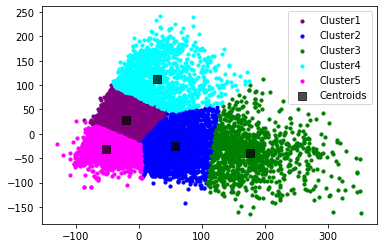

In [94]:
# Representing the CLusters in graphical representation
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1],s=10, c='purple',label='Cluster1')
plt.show()
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1],s=10, c='blue',label='Cluster2')
plt.show()
plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1],s=10, c='green',label='Cluster3')
plt.show()
plt.scatter(x_pca[y_kmeans==3,0],x_pca[y_kmeans==3,1],s=10, c='cyan',label='Cluster4')
plt.show()
plt.scatter(x_pca[y_kmeans==4,0],x_pca[y_kmeans==4,1],s=10, c='magenta',label='Cluster5')
plt.show()
plt.scatter(kmeansmodel.cluster_centers_[:,0], kmeansmodel.cluster_centers_[:,1],s=50,marker='s', c='black', alpha=0.7, label='Centroids')
plt.legend()
plt.show()

In [95]:
# Calculating the accuracies of each Cluster and overall accuracy of the model
sample_silhouette_values = metrics.silhouette_samples(x_pca, cluster_labels)

means_lst = []
for label in range(5):
    means_lst.append(sample_silhouette_values[cluster_labels == label].mean())
print("Cluster 0: "+ str(means_lst[0]))
print("Cluster 1: "+ str(means_lst[1]))
print("Cluster 2: "+ str(means_lst[2]))
print("Cluster 3: "+ str(means_lst[3]))
print("Cluster 4: "+ str(means_lst[4]))
print("Average Silhouette Accuracy : %0.3f"% metrics.silhouette_score(x_pca, cluster_labels,metric='euclidean'))

Cluster 0: 0.3788321
Cluster 1: 0.3347714
Cluster 2: 0.36491236
Cluster 3: 0.310991
Cluster 4: 0.48738664
Average Silhouette Accuracy : 0.406


# VGG16 + K-means

In [96]:
# Loading the pre-trained VGG16 model with imagenet weights and exluding the Fully connected and Classification layers for transfer learning 
VGG_model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58892288/58889256 [==============================] - 49s 1us/step


In [97]:
# Summary of VGG16
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
# Applying the images to extract the features from the images
predicted_VGGfeatures= VGG_model.predict(kmeans_dataset)

In [28]:
# taking a copy of the Features
to_reshape = predicted_VGGfeatures.copy()

In [37]:
# Reducing the 7x7x512 feature dimensions to 14822x25088 dataframe
images_temp = to_reshape.reshape(14822, -1)

In [43]:
# Applying the StandardScaler function to transform the data
scaler=StandardScaler()
scaler.fit(images_temp)
scaled_data=scaler.transform(images_temp)

In [51]:
# Reducing the dimensions from 900 to 2
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [52]:
# Applying the k-means algorithm with 5 Cluster size
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=728)
y_kmeans= kmeansmodel.fit_predict(x_pca)
cent = kmeansmodel.cluster_centers_
cluster_labels = kmeansmodel.labels_

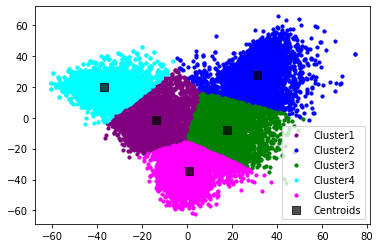

In [53]:
# Representing the CLusters in graphical representation
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1],s=10, c='purple',label='Cluster1')
#plt.show()
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1],s=10, c='blue',label='Cluster2')
#plt.show()
plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1],s=10, c='green',label='Cluster3')
#plt.show()
plt.scatter(x_pca[y_kmeans==3,0],x_pca[y_kmeans==3,1],s=10, c='cyan',label='Cluster4')
#plt.show()
plt.scatter(x_pca[y_kmeans==4,0],x_pca[y_kmeans==4,1],s=10, c='magenta',label='Cluster5')
#plt.show()
plt.scatter(kmeansmodel.cluster_centers_[:,0], kmeansmodel.cluster_centers_[:,1],s=50,marker='s', c='black', alpha=0.7, label='Centroids')
plt.legend()
plt.show()

In [57]:
# Calculating the accuracies of each Cluster and overall accuracy of the model
sample_silhouette_values = metrics.silhouette_samples(x_pca, cluster_labels)

means_lst = []
for label in range(5):
    means_lst.append(sample_silhouette_values[cluster_labels == label].mean())
print("CLuster 0: "+ str(means_lst[0]))
print("CLuster 1: "+ str(means_lst[1]))
print("CLuster 2: "+ str(means_lst[2]))
print("CLuster 3: "+ str(means_lst[3]))
print("CLuster 4: "+ str(means_lst[4]))
print("Average Silhouette Accuracy : %0.3f"% metrics.silhouette_score(x_pca, cluster_labels,metric='euclidean'))

CLuster 0: 0.33333874
CLuster 1: 0.4865943
CLuster 2: 0.3459716
CLuster 3: 0.5480689
CLuster 4: 0.500461
Average Silhouette Accuracy : 0.446
